# **Valorización de Días de Descanso de los Accidentes de Trabajo - [Ministerio de Trabajo y Promoción del Empleo - MTPE]**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [41]:
path_local = r'C:\Users\Fabrizio\Documents\Datathon_PNDA\Datathon-PNDA\data'
data = pd.read_csv(path_local + r'\dataset_Accidentes_de_Trabajo.csv', encoding = 'latin-1',
                  converters = {'FECHA_CORTE':str, 'PERIODO_REGISTRO':str, 'FECHA_ACCIDENTE':str,
                               'UBIGEO':str})
data = data.dropna()
data.head()

,FECHA_CORTE,PERIODO_REGISTRO,FECHA_ACCIDENTE,TIPO_ACCIDENTE,SUB_GRUPO_TIPO_ACCIDENTE,AGENTE_CAUSANTE,SUB_GRUPO_AGENTE_CAUSANTE_1,PARTE_AFECTADA,NATURALEZA_LESION,DEPARTAMENTO,...,ESTADO_CIVIL,CATEGORIA_OCUPACIONAL,TIPO_CONTRATO,GRADO_INSTRUCCION,AREA_TRABAJO,EDAD,TURNO_TRABAJO,GRAVEDAD_ACCIDENTE,DIAS_DESCANSO,MONTO_DESCANSO
0,20230511,202304,20230419,ATRAPADA POR UN OBJETO O ENTRE OBJETOS,ATRAPADA POR UN OBJETO,OTROS APARATOS,OTROS APARATOS NO CLASIFICADOS BAJO OTROS EPÍG...,DEDOS DE LA MANO,HERIDAS CORTANTES,AREQUIPA,...,SOLTERO/A,OTROS,PLAZO FIJO,EDUCACIÓN TÉCNICA COMPLETA(2),MANTENIMIENTO,35.0,DÍA,ACCIDENTE INCAPACITANTE,11.0,1036.38
1,20230511,202304,20230410,ATRAPADA POR UN OBJETO O ENTRE OBJETOS,ATRAPADA POR UN OBJETO,MEDIOS DE TRANSPORTE Y DE MANUTENCIÓN,"MEDIOS DE TRANSPORTE RODANTES, A EXCEPCIÓN DE ...",MANO (CON EXCEPCIÓN DE LOS DEDOS SOLOS),TRAUMATISMOS INTERNOS,LIMA,...,SOLTERO/A,OPERARIO,PLAZO FIJO,EDUCACIÓN SECUNDARIA COMPLETA,PRODUCCIÓN,18.0,DÍA,ACCIDENTE INCAPACITANTE,5.0,349.30
2,20230511,202304,20230410,OTRAS FORMAS DE ACCIDENTE NO CLASIFICADAS POR ...,NO REGISTRA SUBGRUPO DE TIPO DE ACCIDENTE,"MATERIALES, SUSTANCIAS Y RADIACIONES","POLVOS, GASES, LÍQUIDOS Y PRODUCTOS QUÍMICOS, ...","ÓRGANO, APARATO O SISTEMA AFECTADO POR SUSTANC...",INTOXICACIONES,LIMA,...,SOLTERO/A,OPERARIO,INDETERMINADO,EDUCACIÓN SECUNDARIA COMPLETA,PLANTA,32.0,DÍA,ACCIDENTE INCAPACITANTE,1.0,69.86
3,20230511,202304,20230427,PUNZO CORTANTES,NO REGISTRA SUBGRUPO DE TIPO DE ACCIDENTE,AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUF...,NO REGISTRA SUB GRUPO DE AGENTE CAUSANTE,MANO (CON EXCEPCIÓN DE LOS DEDOS SOLOS),HERIDAS CORTANTES,AREQUIPA,...,SOLTERO/A,PEÓN,TIEMPO PARCIAL,EDUCACIÓN SECUNDARIA COMPLETA,ALBAÑILERIA,20.0,DÍA,ACCIDENTE INCAPACITANTE,5.0,349.30
4,20230511,202304,20230411,CAÍDAS DE OBJETOS,OTRAS CAÍDAS DE OBJETOS,AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUF...,NO REGISTRA SUB GRUPO DE AGENTE CAUSANTE,"HOMBRO (INCLUSIÓN DE CLAVÍCULAS, OMOPLATO Y AX...",CONTUSIONES,CALLAO,...,SOLTERO/A,EMPLEADO,INDETERMINADO,EDUCACIÓN UNIVERSITARIA INCOMPLETA(4),ALMACÉN,36.0,DÍA,ACCIDENTE INCAPACITANTE,2.0,128.85


## **Entendiendo la estructura de la data y aplicando limpieza**

In [94]:
data.columns

Index(['FECHA_CORTE', 'PERIODO_REGISTRO', 'FECHA_ACCIDENTE', 'TIPO_ACCIDENTE',
       'SUB_GRUPO_TIPO_ACCIDENTE', 'AGENTE_CAUSANTE',
       'SUB_GRUPO_AGENTE_CAUSANTE_1', 'PARTE_AFECTADA', 'NATURALEZA_LESION',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO',
       'ACTIVIDAD_ECONOMICA', 'SEGURO_SALUD', 'COBERTURA_PENSION',
       'SEXO_TRABAJADOR', 'ESTADO_CIVIL', 'CATEGORIA_OCUPACIONAL',
       'TIPO_CONTRATO', 'GRADO_INSTRUCCION', 'AREA_TRABAJO', 'EDAD',
       'TURNO_TRABAJO', 'GRAVEDAD_ACCIDENTE', 'DIAS_DESCANSO',
       'MONTO_DESCANSO'],
      dtype='object')

In [42]:
print(f'El dataset cuenta con {data.shape[0]} filas y {data.shape[1]} columnas.')

El dataset cuenta con 30329 filas y 27 columnas.


In [43]:
print("¿El dataset cuenta con valores nulos por columna?")
data.isnull().sum()

¿El dataset cuenta con valores nulos por columna?


FECHA_CORTE                    0
PERIODO_REGISTRO               0
FECHA_ACCIDENTE                0
TIPO_ACCIDENTE                 0
SUB_GRUPO_TIPO_ACCIDENTE       0
AGENTE_CAUSANTE                0
SUB_GRUPO_AGENTE_CAUSANTE_1    0
PARTE_AFECTADA                 0
NATURALEZA_LESION              0
DEPARTAMENTO                   0
PROVINCIA                      0
DISTRITO                       0
UBIGEO                         0
ACTIVIDAD_ECONOMICA            0
SEGURO_SALUD                   0
COBERTURA_PENSION              0
SEXO_TRABAJADOR                0
ESTADO_CIVIL                   0
CATEGORIA_OCUPACIONAL          0
TIPO_CONTRATO                  0
GRADO_INSTRUCCION              0
AREA_TRABAJO                   0
EDAD                           0
TURNO_TRABAJO                  0
GRAVEDAD_ACCIDENTE             0
DIAS_DESCANSO                  0
MONTO_DESCANSO                 0
dtype: int64

In [44]:
print("Tipo de dato de las columnas")
data.dtypes

Tipo de dato de las columnas


FECHA_CORTE                     object
PERIODO_REGISTRO                object
FECHA_ACCIDENTE                 object
TIPO_ACCIDENTE                  object
SUB_GRUPO_TIPO_ACCIDENTE        object
AGENTE_CAUSANTE                 object
SUB_GRUPO_AGENTE_CAUSANTE_1     object
PARTE_AFECTADA                  object
NATURALEZA_LESION               object
DEPARTAMENTO                    object
PROVINCIA                       object
DISTRITO                        object
UBIGEO                          object
ACTIVIDAD_ECONOMICA             object
SEGURO_SALUD                    object
COBERTURA_PENSION               object
SEXO_TRABAJADOR                 object
ESTADO_CIVIL                    object
CATEGORIA_OCUPACIONAL           object
TIPO_CONTRATO                   object
GRADO_INSTRUCCION               object
AREA_TRABAJO                    object
EDAD                           float64
TURNO_TRABAJO                   object
GRAVEDAD_ACCIDENTE              object
DIAS_DESCANSO            

In [45]:
data["MONTO_DESCANSO"] = data["MONTO_DESCANSO"].astype('float') 

## **Análisis Exploratorio de los Datos**

In [46]:
data.describe()

,EDAD,DIAS_DESCANSO,MONTO_DESCANSO
count,30329.000000,30329.000000,30329.000000
mean,35.661380,4.404959,323.323953
std,11.243598,22.083024,1537.749196
min,18.000000,0.000000,0.000000
25%,27.000000,2.000000,78.830000
50%,34.000000,3.000000,181.400000
75%,43.000000,5.000000,319.400000
max,70.000000,2828.000000,184421.420000


1. **Edad**: La edad promedio de los colaboradores que tuvieron un accidente de trabajo es de 36 años. Teniendo como máximo una edad de 70 y mínima de 18 años.

2. **Días descanso**: En promedio, los colaboradores que tuvieron un accidente de trabajo se le asignaron 5 días de descanso.

3. **Monto del descanso**: La valoración promedio asignada a los días de descanso por el accidente de trajado es de S/. 323, pero con un monto máximo alrededor de S/. 18,000.

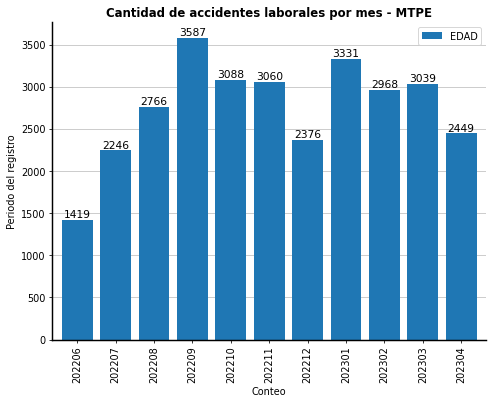

In [62]:
df1 = pd.DataFrame(data.groupby("PERIODO_REGISTRO")["EDAD"].count(
)).reset_index().sort_values("PERIODO_REGISTRO", ascending = True).set_index("PERIODO_REGISTRO")
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
df1.plot(ax = ax, kind = 'bar', width=0.8)
ax.bar_label(ax.containers[0], fontsize=11)
for i in ['bottom', 'left']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(1.5) 
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.xlabel("Conteo")
plt.ylabel("Periodo del registro")
plt.title("Cantidad de accidentes laborales por mes - MTPE", size = 12, fontweight = 'bold')
plt.show()

In [72]:
print(f"El crecimiento promedio mensual de la cantidad de accidentes laborales registrados por mes es de {round(df1.pct_change().dropna().mean().values[0]*100,2)}%.")

El crecimiento promedio mensual de la cantidad de accidentes laborales registrados por mes es de 8.62%.


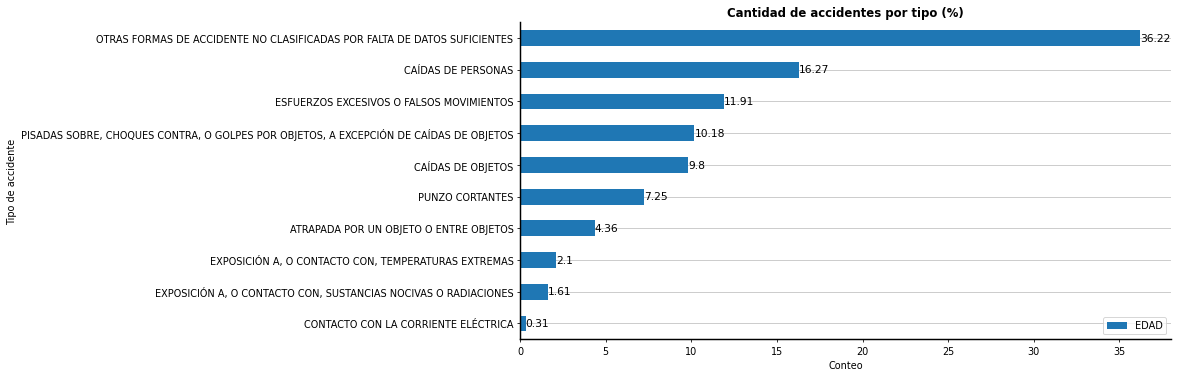

In [86]:
df2 = pd.DataFrame(data.groupby("TIPO_ACCIDENTE")["EDAD"].count(
    )).apply(lambda x : round(x / len(data["EDAD"])*100,2)).sort_values("EDAD")
fig, ax = plt.subplots(figsize = (12,6), dpi = 70)
df2.plot(kind = 'barh', ax = ax)
ax.bar_label(ax.containers[0], fontsize=11)
for i in ['bottom', 'left']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(1.5) 
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.xlabel("Conteo")
plt.ylabel("Tipo de accidente")
plt.title("Cantidad de accidentes por tipo (%)", size = 12, fontweight = 'bold')
plt.show()

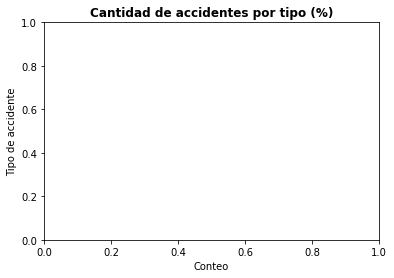

In [93]:
df3 = pd.DataFrame(data.groupby("AGENTE_CAUSANTE")["EDAD"].count()).apply(lambda x : round(x / len(data["EDAD"])*100,2))
df3 = df3.sort_values("EDAD")
df3.plot(kind = 'barh', ax = ax)
ax.bar_label(ax.containers[0], fontsize=11)
for i in ['bottom', 'left']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(1.5) 
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.xlabel("Conteo")
plt.ylabel("Tipo de accidente")
plt.title("Cantidad de accidentes por tipo (%)", size = 12, fontweight = 'bold')
plt.show()